<a href="https://colab.research.google.com/github/Nabakindagrace/gracenabakinda_codes/blob/main/Nabakinda_Grace_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###imprting libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
## mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##importing the dataset into the notebook
data=pd.read_csv('/content/drive/MyDrive/1) iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**ABOUT THE DATA SET (IRIS DATASET)**

The data set contains 150 rows × 5 columns, representing a unique iris flower, with measurements and a species label.

**Features (Input Variables):**

Each flower is described by four numerical features:

• Sepal Length (cm)

• Sepal Width (cm)

• Petal Length (cm)

• Petal Width (cm)

These measurements represent key physical characteristics that vary among different species of iris flowers.

**Target Variable (Output Label):**

Species: This is the class label the model is trained to predict. It includes three categories:

• Iris-setosa

• Iris-versicolor

• Iris-virginica

The goal is to Implement K-Means clustering to group similar data points together based on feature similarities


In [ ]:
#Checking Data Types
data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [ ]:
##checking for missing values
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# **Clustering Analysis (K-Means)**

**1. Data Standardization and Preparation**

In [ ]:
 # Separating features (numerical columns) by dropping 'species'
X = data.drop('species', axis=1)

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X= scaler.fit_transform(X)
scaled_X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

**2. Elbow Method for Optimal Clusters**

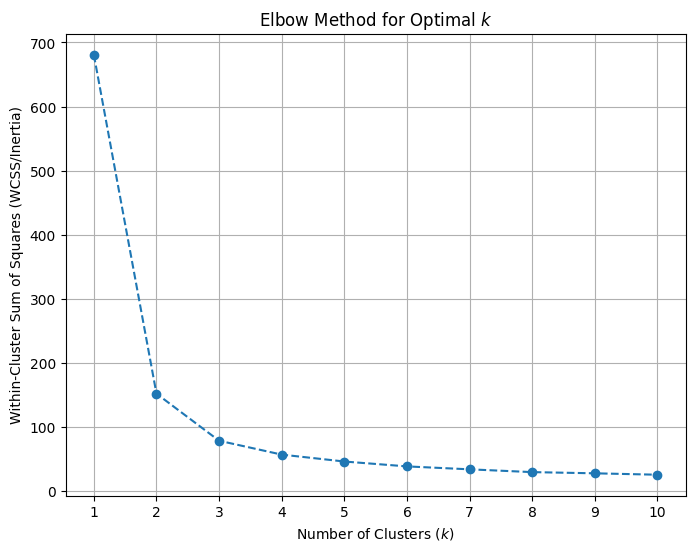

In [ ]:
# Determining the optimal number of clusters using the Elbow Method
wcss = []
K_MAX = 10
for i in range(1, K_MAX + 1):
    # Initialize KMeans
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    # The 'inertia_' attribute is the WCSS
    wcss.append(kmeans.inertia_)

# Ploting the Elbow results
plt.figure(figsize=(8, 6))
plt.plot(range(1, K_MAX + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal $k$')
plt.xlabel('Number of Clusters ($k$)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS/Inertia)')
plt.grid(True)
plt.xticks(np.arange(1, K_MAX + 1, 1))
plt.savefig('elbow_method.png')

**Interpratation.**

Based on the Elbow plot above, the graph's significant reduction in the Within-Cluster Sum of Squares (WCSS) plateaus after k=3, making k=3 the optimal number of clusters. This indicates that the dataset is best partitioned into three distinct groups.

**Cluster Analysis**

In [ ]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(scaled_X)
data['Cluster'] = kmeans_final.labels_

In [ ]:
# Applying K-Means with Optimal k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_X)

# Creating DataFrame with Cluster Labels
df_interpret = data
df_interpret['Cluster'] = cluster_labels

# Enhanced Cluster Analysis Code

# A) Calculating Centroids (Mean Feature Values)
cluster_analysis = df_interpret.groupby('Cluster').agg({
    'sepal_length': 'mean',
    'sepal_width': 'mean',
    'petal_length': 'mean',
    'petal_width': 'mean'
}).round(2)

# B) Calculating Cluster Size (n)
cluster_size = df_interpret.groupby('Cluster').size().rename('n (Size)')

# C) Determining Primary Species Match (Mode)
def get_primary_species(series):
    """Returns the most frequent species (mode) and its count relative to the cluster size."""
    mode_result = series.mode()
    if not mode_result.empty:
        mode_species = mode_result.iloc[0]
        mode_count = series.value_counts().max()
        total_size = len(series)
        return f"{mode_species} ({mode_count}/{total_size})"
    return "N/A"

primary_species_match = df_interpret.groupby('Cluster')['species'].apply(get_primary_species).rename('Primary Species (Match)')

# D) Combining all results
cluster_analysis_final = pd.concat([cluster_size, cluster_analysis, primary_species_match], axis=1)

print("Enhanced Cluster Characteristics:")
print(cluster_analysis_final)

Enhanced Cluster Characteristics:
         n (Size)  sepal_length  sepal_width  petal_length  petal_width  \
Cluster                                                                   
0              53          5.80         2.67          4.37         1.41   
1              50          5.01         3.42          1.46         0.24   
2              47          6.78         3.10          5.51         1.97   

        Primary Species (Match)  
Cluster                          
0            versicolor (39/53)  
1                setosa (50/50)  
2             virginica (36/47)  


**Interpretation.**

This table above clearly shows the size of each cluster and confirms the primary species identified by the clustering algorithm, demonstrating high accuracy in separating the setosa specie.

**3. Visualization of the clusters using 2D scatter plots.**

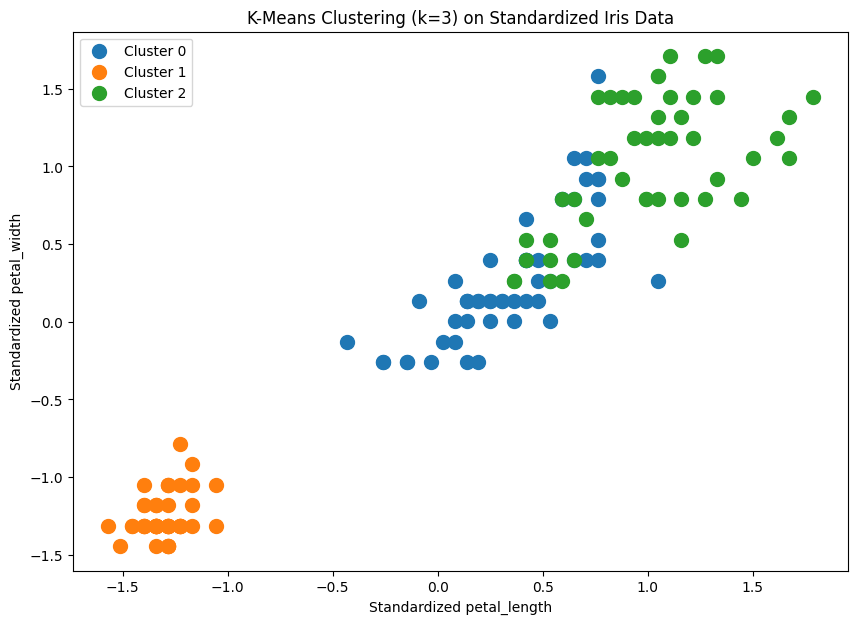

In [ ]:
# Optimal number of clusters is 3
optimal_k = 3

# Applying K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
# X_scaled is the standardized NumPy array
cluster_labels = kmeans.fit_predict(scaled_X)

# Preparing data for visualization
df_clustered = pd.DataFrame(scaled_X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_clustered['cluster'] = cluster_labels

# Selecting two features for 2D visualization
feature_x = 'petal_length'
feature_y = 'petal_width'

# Ploting the clusters
plt.figure(figsize=(10, 7))

# Scatter plot for each cluster
for i in range(optimal_k):
    subset = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(subset[feature_x], subset[feature_y],
                label=f'Cluster {i}', s=100)

plt.title(f'K-Means Clustering (k={optimal_k}) on Standardized Iris Data')
plt.xlabel(f'Standardized {feature_x}')
plt.ylabel(f'Standardized {feature_y}')
plt.legend()
plt.grid(False)
plt.savefig('kmeans_clusters.png')

**Interpretation.**

 The visualization above successfully demonstrates that K-Means effectively separates the data into three groups based on feature similarity (petal length and petal width), with the separation being most clear for Iris setosa (Cluster 1) and more ambiguous at the boundary between Iris versicolor (Cluster 0) and Iris virginica (Cluster 2).

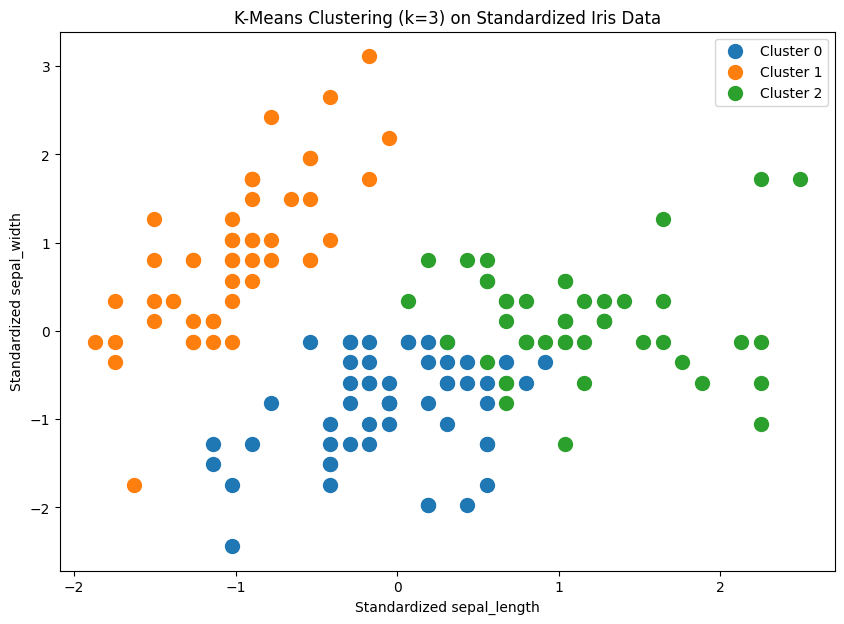

In [ ]:
# Optimal number of clusters is 3
optimal_k = 3

# Applying K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
# X_scaled is the standardized NumPy array
cluster_labels = kmeans.fit_predict(scaled_X)

# Preparing data for visualization
df_clustered = pd.DataFrame(scaled_X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_clustered['cluster'] = cluster_labels

# Selecting two features for 2D visualization
feature_x = 'sepal_length'
feature_y = 'sepal_width'

# Ploting the clusters
plt.figure(figsize=(10, 7))

# Scatter plot for each cluster
for i in range(optimal_k):
    subset = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(subset[feature_x], subset[feature_y],
                label=f'Cluster {i}', s=100)

plt.title(f'K-Means Clustering (k={optimal_k}) on Standardized Iris Data')
plt.xlabel(f'Standardized {feature_x}')
plt.ylabel(f'Standardized {feature_y}')
plt.legend()
plt.grid(False)
plt.savefig('kmeans_clusters.png')

**Interpretation.**

 The visualization above successfully demonstrates that K-Means effectively separates the data into three groups based on feature similarity (sepal length and sepal width), with the separation being most clear for Iris setosa (Cluster 1) and more ambiguous at the boundary between Iris versicolor (Cluster 0) and Iris virginica (Cluster 2).